## Group 4 
### Team members: 
1) Ashlyn Brown

2) Harper Kates

3) Lala Yamazaki

4) Pankaj Kulkarni


## 1.Visualizing an interesting insight from the data to be added to the dashboard on the website.
## 2.Creating a model that will make a numerical prediction that will be interesting forInsideAirbnb.com

## Section 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn
import datetime as dt
from sqlalchemy import create_engine

pd.set_option('display.max_columns', 500)
#allows for up to 500 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows', 500)
# up to 500 rows

import warnings
warnings.simplefilter("ignore")   
#To hide deprecation warnings 

from IPython.core.display import display, HTML
# New trick to widen the scree
display(HTML("<style>.container { width:95% !important; }</style>"))
#Widens the code landscape
sns.set_style('whitegrid')

## Section 2. Import Data

In [2]:
df_ad87 = pd.read_csv("data/amenitiesdummies_top87.csv", index_col = None, header = 0)
df_hosts = pd.read_csv("data/hosts.csv", index_col = None, header = 0)
df_cal_list = pd.read_csv('data/cal_listings.csv.gz', compression='gzip', index_col=None, header=0, sep=',',
                              quotechar='"')
df_calendar = pd.read_csv('data/calendar.csv.gz', compression='gzip', index_col=None, header=0, sep=',',
                              quotechar='"')
df_listings = pd.read_csv('data/listings.csv.gz', compression='gzip', index_col=None, header=0, sep=',',
                              quotechar='"')
df_lr = pd.read_csv('data/listings_review.csv.gz', compression='gzip', index_col=None, header=0, sep=',',
                              quotechar='"')
df_reviews = pd.read_csv('data/reviews.csv.gz', compression='gzip', index_col=None, header=0, sep=',',
                              quotechar='"')
# import data

In [3]:
display(df_ad87.info())
pd.options.display.max_columns = None
df_ad87.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6144 entries, 0 to 6143
Data columns (total 88 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Index                        6144 non-null   int64
 1   Wifi                         6144 non-null   int64
 2   Smokealarm                   6144 non-null   int64
 3   Heating                      6144 non-null   int64
 4   Airconditioning              6144 non-null   int64
 5   TV                           6144 non-null   int64
 6   Essentials                   6144 non-null   int64
 7   Hairdryer                    6144 non-null   int64
 8   Iron                         6144 non-null   int64
 9   Hangers                      6144 non-null   int64
 10  Kitchen                      6144 non-null   int64
 11  Longtermstaysallowed         6144 non-null   int64
 12  Shampoo                      6144 non-null   int64
 13  Freeparkingonpremises        6144 non-null   int

None

,Index,Wifi,Smokealarm,Heating,Airconditioning,TV,Essentials,Hairdryer,Iron,Hangers,Kitchen,Longtermstaysallowed,Shampoo,Freeparkingonpremises,Coffeemaker,Dryer,Washer,Hotwater,Carbonmonoxidealarm,Dedicatedworkspace,Refrigerator,Fireextinguisher,Microwave,Dishesandsilverware,Cookingbasics,Oven,Privateentrance,Stove,Bedlinens,Dishwasher,Patioorbalcony,Firstaidkit,Extrapillowsandblankets,Freestreetparking,CableTV,Keypad,Gardenorbackyard,Bathtub,Luggagedropoffallowed,BBQgrill,Pool,Gym,Smartlock,Showergel,Bakingsheet,Elevator,Indoorfireplace,Room-darkeningshades,Singlelevelhome,Pack\u2019nPlay/travelcrib,Lockbox,Freezer,Bodysoap,Breakfast,Ceilingfan,Conditioner,Ethernetconnection,Lockonbedroomdoor,Children\u2019sbooksandtoys,Hottub,Highchair,Barbecueutensils,Keurigcoffeemachine,Paidparkingonpremises,Paidparkingoffpremises,Babysitterrecommendations,Bathroomessentials,Bedroomcomforts,Wineglasses,Toaster,Selfcheck-in,Cleaningbeforecheckout,Diningtable,Outdoorfurniture,Children\u2019sdinnerware,Cleaningproducts,EVcharger,Fullkitchen,Pocketwifi,Buildingstaff,Outletcovers,Portablefans,Crib,Laundromatnearby,Hostgreetsyou,Babysafetygates,Gameconsole,Outdoordiningarea
0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,0,1,1,1,0,0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,1,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,0,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
display(df_hosts.info())
df_hosts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 2917 non-null   int64  
 1   host_name                  2915 non-null   object 
 2   host_since                 2917 non-null   float64
 3   host_response_rate         2181 non-null   object 
 4   host_acceptance_rate       2478 non-null   object 
 5   host_is_superhost          2917 non-null   int64  
 6   host_neighbourhood         711 non-null    object 
 7   host_listings_count        2917 non-null   float64
 8   host_total_listings_count  2917 non-null   float64
 9   host_has_profile_pic       2917 non-null   int64  
 10  host_identity_verified     2917 non-null   int64  
 11  hv_None                    2917 non-null   int64  
 12  hv_email                   2917 non-null   int64  
 13  hv_facebook                2917 non-null   int64

None

,Unnamed: 0,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,hv_None,hv_email,hv_facebook,hv_google,hv_government_id,hv_identity_manual,hv_jumio,hv_kba,hv_manual_offline,hv_manual_online,hv_offline_government_id,hv_phone,hv_photographer,hv_reviews,hv_selfie,hv_sent_id,hv_work_email,response_few_days,response_few_hours,response_within_day,response_within_hour,host_id,reviews_per_month,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room
0,0,Marilyn,4702.0,NaN,NaN,0,NaN,1.0,1.0,1,1,0,1,1,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1147,0.00,0,0,1,0
1,1,Jack,4538.0,NaN,NaN,0,NaN,1.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,6383,0.14,1,0,0,0
2,2,Michele,4455.0,NaN,19%,1,NaN,0.0,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,12172,4.69,0,0,1,0
3,3,Diana,4378.0,100%,56%,1,NaN,16.0,16.0,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,1,0,0,0,0,0,1,22296,2.82,0,0,6,1
4,4,Russ,4299.0,50%,71%,0,NaN,0.0,0.0,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,1,0,0,0,0,1,0,36601,0.24,1,0,1,0


In [5]:
display(df_cal_list.info(verbose=True, show_counts=True))
df_cal_list.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869716 entries, 0 to 1869715
Data columns (total 222 columns):
 #    Column                                        Non-Null Count    Dtype  
---   ------                                        --------------    -----  
 0    listing_id                                    1869716 non-null  int64  
 1    name                                          1869716 non-null  object 
 2    description                                   1862051 non-null  object 
 3    host_id                                       1869716 non-null  int64  
 4    host_name                                     1867526 non-null  object 
 5    host_since                                    1869716 non-null  float64
 6    host_response_rate                            1605075 non-null  object 
 7    host_acceptance_rate                          1750356 non-null  object 
 8    host_is_superhost                             1869716 non-null  int64  
 9    host_neighbourhood    

None

,listing_id,name,description,host_id,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,am_Wifi,am_Smokealarm,am_Heating,am_Airconditioning,am_TV,am_Essentials,am_Hairdryer,am_Iron,am_Hangers,am_Kitchen,am_Longtermstaysallowed,am_Shampoo,am_Freeparkingonpremises,am_Coffeemaker,am_Dryer,am_Washer,am_Hotwater,am_Carbonmonoxidealarm,am_Dedicatedworkspace,am_Refrigerator,am_Fireextinguisher,am_Microwave,am_Dishesandsilverware,am_Cookingbasics,am_Oven,am_Privateentrance,am_Stove,am_Bedlinens,am_Dishwasher,am_Patioorbalcony,am_Firstaidkit,am_Extrapillowsandblankets,am_Freestreetparking,am_CableTV,am_Keypad,am_Gardenorbackyard,am_Bathtub,am_Luggagedropoffallowed,am_BBQgrill,am_Pool,am_Gym,am_Smartlock,am_Showergel,am_Bakingsheet,am_Elevator,am_Indoorfireplace,am_Room-darkeningshades,am_Singlelevelhome,am_Pack\u2019nPlay/travelcrib,am_Lockbox,am_Freezer,am_Bodysoap,am_Breakfast,am_Ceilingfan,am_Conditioner,am_Ethernetconnection,am_Lockonbedroomdoor,am_Children\u2019sbooksandtoys,am_Hottub,am_Highchair,am_Barbecueutensils,am_Keurigcoffeemachine,am_Paidparkingonpremises,am_Paidparkingoffpremises,am_Babysitterrecommendations,am_Bathroomessentials,am_Bedroomcomforts,am_Wineglasses,am_Toaster,am_Selfcheck-in,am_Cleaningbeforecheckout,am_Diningtable,am_Outdoorfurniture,am_Children\u2019sdinnerware,am_Cleaningproducts,am_EVcharger,am_Fullkitchen,am_Pocketwifi,am_Buildingstaff,am_Outletcovers,am_Portablefans,am_Crib,am_Laundromatnearby,am_Hostgreetsyou,am_Babysafetygates,am_Gameconsole,am_Outdoordiningarea,hv_None,hv_email,hv_facebook,hv_google,hv_government_id,hv_identity_manual,hv_jumio,hv_kba,hv_manual_offline,hv_manual_online,hv_offline_government_id,hv_phone,hv_photographer,hv_reviews,hv_selfie,hv_sent_id,hv_work_email,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room,dist_1,dist_10,dist_11,dist_12,dist_13,dist_14,dist_15,dist_16,dist_17,dist_18,dist_19,dist_2,dist_20,dist_21,dist_22,dist_23,dist_24,dist_25,dist_26,dist_27,dist_28,dist_29,dist_3,dist_30,dist_31,dist_32,dist_33,dist_34,dist_35,dist_4,dist_5,dist_6,dist_7,dist_8,dist_9,response_few_days,response_few_hours,response_within_day,response_within_hour,host_local,cal_available,cal_price,cal_minimum_nights,cal_maximum_nights,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2021,year_2022
0,6422,Nashville Charm,30 day or more rental during COVID. Show COVID...,12172,Michele,4451.0,NaN,19%,1,NaN,0.0,0.0,1,1,"Nashville, Tennessee, United States",36.17315,-86.73581,Private room in house,Private room,2,1.0,2.0,3.0,40.0,30,365,1,3,3,3,267,674,6,0,4424.0,464.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,1,0,4.69,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,0,1,1,1,0,0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,40.0,30.0,365.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,6422,Nashville Charm,30 day or more rental during COVID. S

In [6]:
display(df_calendar.info())
df_calendar.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242782 entries, 0 to 2242781
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 119.8+ MB


None

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6422,2021-02-20,f,$40.00,$40.00,30.0,365.0
1,6422,2021-02-21,f,$40.00,$40.00,30.0,365.0
2,6422,2021-02-22,f,$40.00,$40.00,30.0,365.0
3,6422,2021-02-23,f,$40.00,$40.00,30.0,365.0
4,6422,2021-02-24,f,$40.00,$40.00,30.0,365.0


In [7]:
display(df_listings.info())
df_listings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6144 entries, 0 to 6143
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6144 non-null   int64  
 1   listing_url                                   6144 non-null   object 
 2   scrape_id                                     6144 non-null   int64  
 3   last_scraped                                  6144 non-null   object 
 4   name                                          6144 non-null   object 
 5   description                                   6079 non-null   object 
 6   neighborhood_overview                         4599 non-null   object 
 7   picture_url                                   6144 non-null   object 
 8   host_id                                       6144 non-null   int64  
 9   host_url                                      6144 non-null   o

None

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6422,https://www.airbnb.com/rooms/6422,20210219004252,2021-02-20,Nashville Charm,30 day or more rental during COVID. Show COVID...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/pro_photo_too...,12172,https://www.airbnb.com/users/show/12172,Michele,2009-04-03,"Nashville, Tennessee, United States",My husband and I are parents of 5 grown childr...,NaN,NaN,19%,t,https://a0.muscache.com/im/users/12172/profile...,https://a0.muscache.com/im/users/12172/profile...,NaN,0.0,0.0,"['phone', 'reviews', 'kba']",t,t,"Nashville, Tennessee, United States",District 6,NaN,36.17315,-86.73581,Private room in house,Private room,2,NaN,1 private bath,2.0,3.0,"[""Hair dryer"", ""Bathtub"", ""Lock on bedroom doo...",$40.00,30,365,30,30,365,365,30.0,365.0,NaN,t,3,3,3,267,2021-02-20,674,6,0,2009-04-30,2020-03-03,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,0,1,0,4.69
1,25613,https://www.airbnb.com/rooms/25613,20210219004252,2021-02-20,Room in Historic East Nashville Craftsman Home,Serve up some sweet sounds on the piano and wi...,This home is in a walkable neighborhood with i...,https://a0.muscache.com/pictures/60aa90fe-1b3f...,95811,https://www.airbnb.com/users/show/95811,Nell,2010-03-18,"Nashville, Tennessee, United States",My husband Michael and I are part of a communi...,within an hour,100%,100%,t,https://a0.muscache.com/im/users/95811/profile...,https://a0.muscache.com/im/users/95811/profile...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Nashville, Tennessee, United States",District 6,NaN,36.17826,-86.74162,Private room in house,Private room,2,NaN,1 private bath,1.0,1.0,"[""Hair dryer"", ""Carbon monoxide alarm"", ""Air c...",$75.00,2,30,2,2,1125,1125,2.0,1125.0,NaN,t,0,0,0,63,2021-02-20,510,4,0,2010-04-25,2020-03-14,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,1,0,1,0,3.87
2,136015,https://www.airbnb.com/rooms/136015,20210219004252,2021-02-20,Apart. on the Ridge near Opryland,Fantastic View! Overlooks farms and is on the ...,Dead end street with great neighbors!,https://a0.muscache.com/pictures/2739438/005be...,666322,https://www.airbnb.com/users/show/666322,Dave And Peggy,2011-06-05,"Nashville, Tennessee, United States","We Love God, people, hosting and art! Our stro...",a few days or more,0%,0%,f,https://a0.muscache.com/im/users/666322/profil...,https://a0.muscache.com/im/users/666322/profil...,NaN,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Nashville, Tennessee, United States",District 15,NaN,36.19464,-86.67195,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Wifi"", ""Dryer"", ""Washer...",$103.00,30,1125,30,30,1125,1125,30.0,1125.0,NaN,t,0,0,0

In [8]:
display(df_lr.info(verbose=True, show_counts=True))
df_lr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5122 entries, 0 to 5121
Data columns (total 197 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    listing_id                                    5122 non-null   int64  
 1    name                                          5122 non-null   object 
 2    description                                   5101 non-null   object 
 3    host_id                                       5122 non-null   int64  
 4    host_name                                     5116 non-null   object 
 5    host_since                                    5122 non-null   float64
 6    host_response_rate                            4397 non-null   object 
 7    host_acceptance_rate                          4795 non-null   object 
 8    host_is_superhost                             5122 non-null   int64  
 9    host_neighbourhood                            2237

None

,listing_id,name,description,host_id,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,am_Wifi,am_Smokealarm,am_Heating,am_Airconditioning,am_TV,am_Essentials,am_Hairdryer,am_Iron,am_Hangers,am_Kitchen,am_Longtermstaysallowed,am_Shampoo,am_Freeparkingonpremises,am_Coffeemaker,am_Dryer,am_Washer,am_Hotwater,am_Carbonmonoxidealarm,am_Dedicatedworkspace,am_Refrigerator,am_Fireextinguisher,am_Microwave,am_Dishesandsilverware,am_Cookingbasics,am_Oven,am_Privateentrance,am_Stove,am_Bedlinens,am_Dishwasher,am_Patioorbalcony,am_Firstaidkit,am_Extrapillowsandblankets,am_Freestreetparking,am_CableTV,am_Keypad,am_Gardenorbackyard,am_Bathtub,am_Luggagedropoffallowed,am_BBQgrill,am_Pool,am_Gym,am_Smartlock,am_Showergel,am_Bakingsheet,am_Elevator,am_Indoorfireplace,am_Room-darkeningshades,am_Singlelevelhome,am_Pack\u2019nPlay/travelcrib,am_Lockbox,am_Freezer,am_Bodysoap,am_Breakfast,am_Ceilingfan,am_Conditioner,am_Ethernetconnection,am_Lockonbedroomdoor,am_Children\u2019sbooksandtoys,am_Hottub,am_Highchair,am_Barbecueutensils,am_Keurigcoffeemachine,am_Paidparkingonpremises,am_Paidparkingoffpremises,am_Babysitterrecommendations,am_Bathroomessentials,am_Bedroomcomforts,am_Wineglasses,am_Toaster,am_Selfcheck-in,am_Cleaningbeforecheckout,am_Diningtable,am_Outdoorfurniture,am_Children\u2019sdinnerware,am_Cleaningproducts,am_EVcharger,am_Fullkitchen,am_Pocketwifi,am_Buildingstaff,am_Outletcovers,am_Portablefans,am_Crib,am_Laundromatnearby,am_Hostgreetsyou,am_Babysafetygates,am_Gameconsole,am_Outdoordiningarea,hv_None,hv_email,hv_facebook,hv_google,hv_government_id,hv_identity_manual,hv_jumio,hv_kba,hv_manual_offline,hv_manual_online,hv_offline_government_id,hv_phone,hv_photographer,hv_reviews,hv_selfie,hv_sent_id,hv_work_email,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room,dist_1,dist_10,dist_11,dist_12,dist_13,dist_14,dist_15,dist_16,dist_17,dist_18,dist_19,dist_2,dist_20,dist_21,dist_22,dist_23,dist_24,dist_25,dist_26,dist_27,dist_28,dist_29,dist_3,dist_30,dist_31,dist_32,dist_33,dist_34,dist_35,dist_4,dist_5,dist_6,dist_7,dist_8,dist_9,response_few_days,response_few_hours,response_within_day,response_within_hour,host_local
0,6422,Nashville Charm,30 day or more rental during COVID. Show COVID...,12172,Michele,4451.0,NaN,19%,1,NaN,0.0,0.0,1,1,"Nashville, Tennessee, United States",36.17315,-86.73581,Private room in house,Private room,2,1.0,2.0,3.0,40.0,30,365,1,3,3,3,267,674,6,0,4424.0,464.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,1,0,4.69,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,0,1,1,1,0,0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,25613,Room in Historic East Nashville Craftsman Home,Serve up some sweet sounds on the piano and wi...,95811,Nell,4102.0,100%,100%,1,NaN,1.0,1.0,1,1,"Nashville, Tennessee, United States",36.17826,-86.74162,Private room in house,Private room,2,1.0,1.0,1.0,75.0,2,30,1,0,0,0,63,510,4,0,4064.0,453.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,1,0,3.87,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1

In [9]:
display(df_reviews.info())
df_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262469 entries, 0 to 262468
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     262469 non-null  int64 
 1   id             262469 non-null  int64 
 2   date           262469 non-null  object
 3   reviewer_id    262469 non-null  int64 
 4   reviewer_name  262469 non-null  object
 5   comments       262343 non-null  object
dtypes: int64(3), object(3)
memory usage: 12.0+ MB


None

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2318,146,2008-09-15,2451,Kevin,1000 times better than staying at a hotel.
1,2318,126302712,2017-01-10,12332845,Jessica,"Our family (two couples, a two year old and an..."
2,2318,140977084,2017-04-01,4789466,Ivan,Top of the list locations we have stayed at! T...
3,2318,147262504,2017-04-25,55817131,Mike,"SUCH an awesome place. Very clean, quiet and s..."
4,2318,161806368,2017-06-18,113604590,Pete,We flew quite a distance to be at our only dau...


## Section 3. Rename columns to use in code with no error (\u2019)

In [10]:
import re

for col in df_lr.columns:
    if re.search('am_Pack.*Play/travelcrib', col):
        df_lr.rename(columns={col: 'am_PacknPlay_travelcrib'}, inplace=True)
    elif re.search('am_Children.*booksandtoys', col):
        df_lr.rename(columns={col: 'am_Childrensbooksandtoys'}, inplace=True)
    elif re.search('am_Children.*dinnerware', col):
        df_lr.rename(columns={col: 'am_Childrensdinnerware'}, inplace=True)
        # rename columns 

In [11]:
import re

for col in df_cal_list.columns:
    if re.search('am_Pack.*Play/travelcrib', col):
        df_cal_list.rename(columns={col: 'am_PacknPlay_travelcrib'}, inplace=True)
    elif re.search('am_Children.*booksandtoys', col):
        df_cal_list.rename(columns={col: 'am_Childrensbooksandtoys'}, inplace=True)
    elif re.search('am_Children.*dinnerware', col):
        df_cal_list.rename(columns={col: 'am_Childrensdinnerware'}, inplace=True)
         # rename columns 

In [12]:
df_lr.dtypes
# see all columns

listing_id                                        int64
name                                             object
description                                      object
host_id                                           int64
host_name                                        object
host_since                                      float64
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                 int64
host_neighbourhood                               object
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                              int64
host_identity_verified                            int64
neighbourhood                                    object
latitude                                        float64
longitude                                       float64
property_type                                   

## Section 4. Creating visuals for the website dashboard
 - Create a clear method to identify and showcase the top-rated Airbnb listings across various districts
 - Create Compare the average review scores of listings that have vs do not have amenities

### Top-rated Airbnb listings across various districts

In [13]:
id_list = ['name', 'host_name', 'price', 'review_scores_rating']
dist_columns = [f'dist_{i}' for i in range(1, 36)]
df_dist = pd.melt(df_lr, id_vars=id_list, value_vars=dist_columns, var_name='district', value_name='index')
df_filt = df_dist[df_dist['index'] == 1]
df_sorted = df_filt.sort_values(by=['district', 'review_scores_rating', 'price'], ascending=[True, False, True])
df_top_dist = df_sorted.groupby('district').first().reset_index()
df_top_dist[['district', 'name', 'host_name', 'price', 'review_scores_rating']]
#generate the list of district columns, assuming you have dist_1 to dist_35
# melt df_all_cleaned to consolidate district columns
# filter for rows where the listing belongs to a district
# sorting by district, then by review score (descending), and price (ascending)
# selecting the top-rated listing in each district and display

,district,name,host_name,price,review_scores_rating
0,dist_1,Germantown Studio,Ninoska,49.0,100.0
1,dist_10,Rolling Acre Room *Monthly* Great Location,Phil,32.0,100.0
2,dist_11,Door on the Left,Tony,40.0,100.0
3,dist_12,Daybed in the Playroom-MorningStar semi-private,Diana,24.0,100.0
4,dist_13,Simple Single room in a great location!,Crissy,42.0,100.0
5,dist_14,"Great condo room, monthly! Near airport!",Diana,31.0,100.0
6,dist_15,"The Oasis - Tranquil, Cozy, Near Airport",Fawn,35.0,100.0
7,dist_16,"PrivateTiny Cabin, Friendly House Gr8 Location!",Jon,24.0,100.0
8,dist_17,Stunning Townhome Near Downtown Nashville,Samuel,47.0,100.0
9,dist_18,Corporate Hideout,Rhonda,44.0,100.0


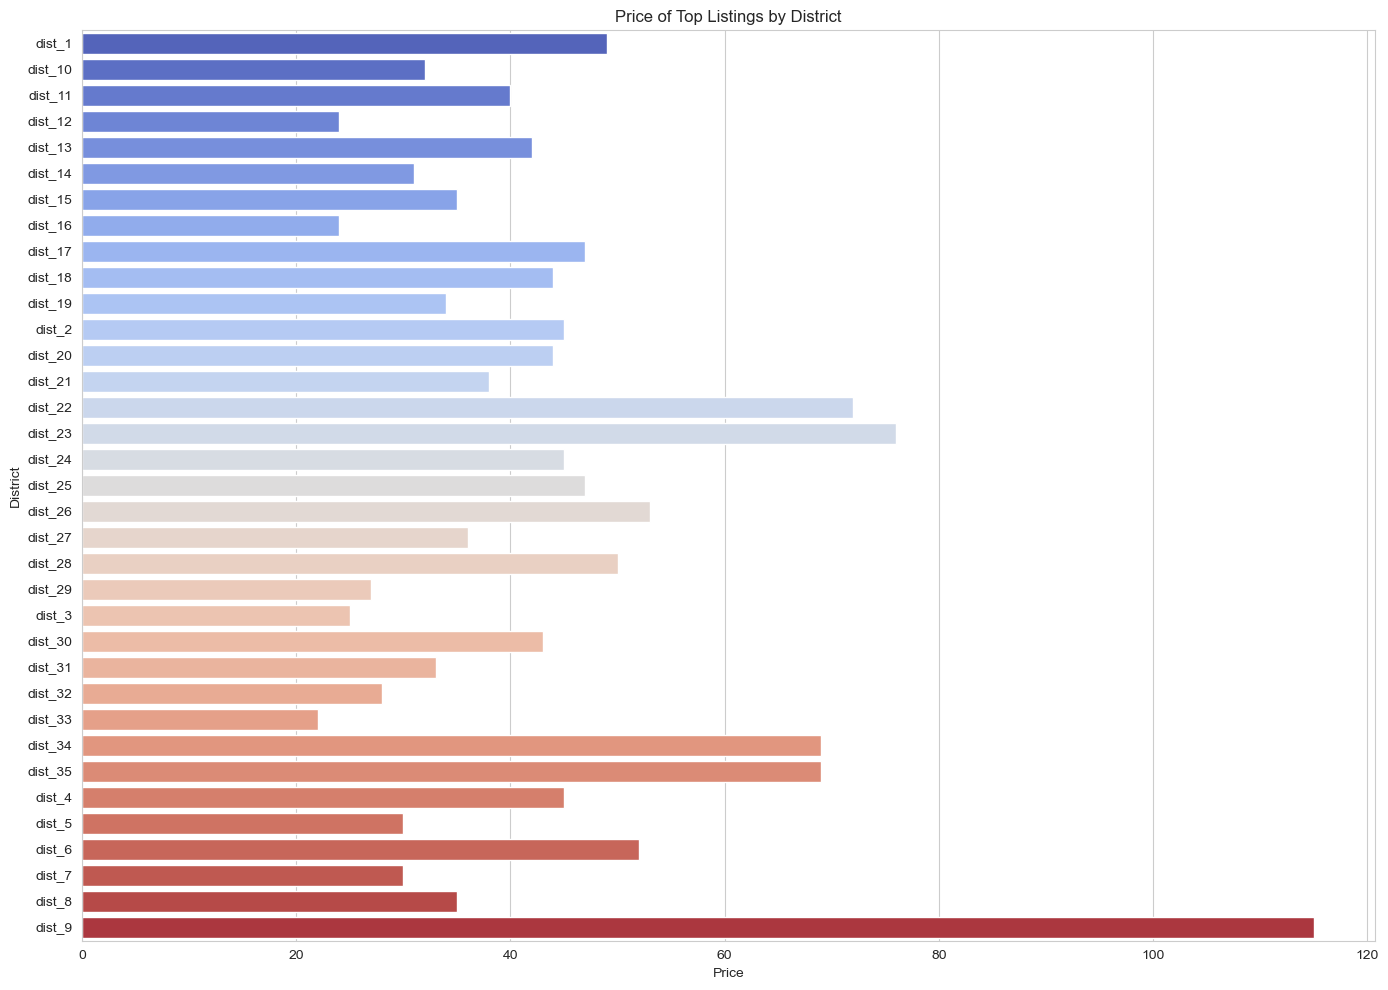

In [14]:
sns.set_style("whitegrid")

plt.figure(figsize=(14, 10))
sns.barplot(data=df_top_dist, x='price', y='district', palette='coolwarm')
plt.title('Price of Top Listings by District')
plt.xlabel('Price')
plt.ylabel('District')
plt.tight_layout()
plt.show()
# create a blot of price of top Listings by District

- This method adapts the district-based analysis to work with districts, allowing to identify the top-rated listings in each district

### Compare the average review scores of listings that have vs do not have amenities

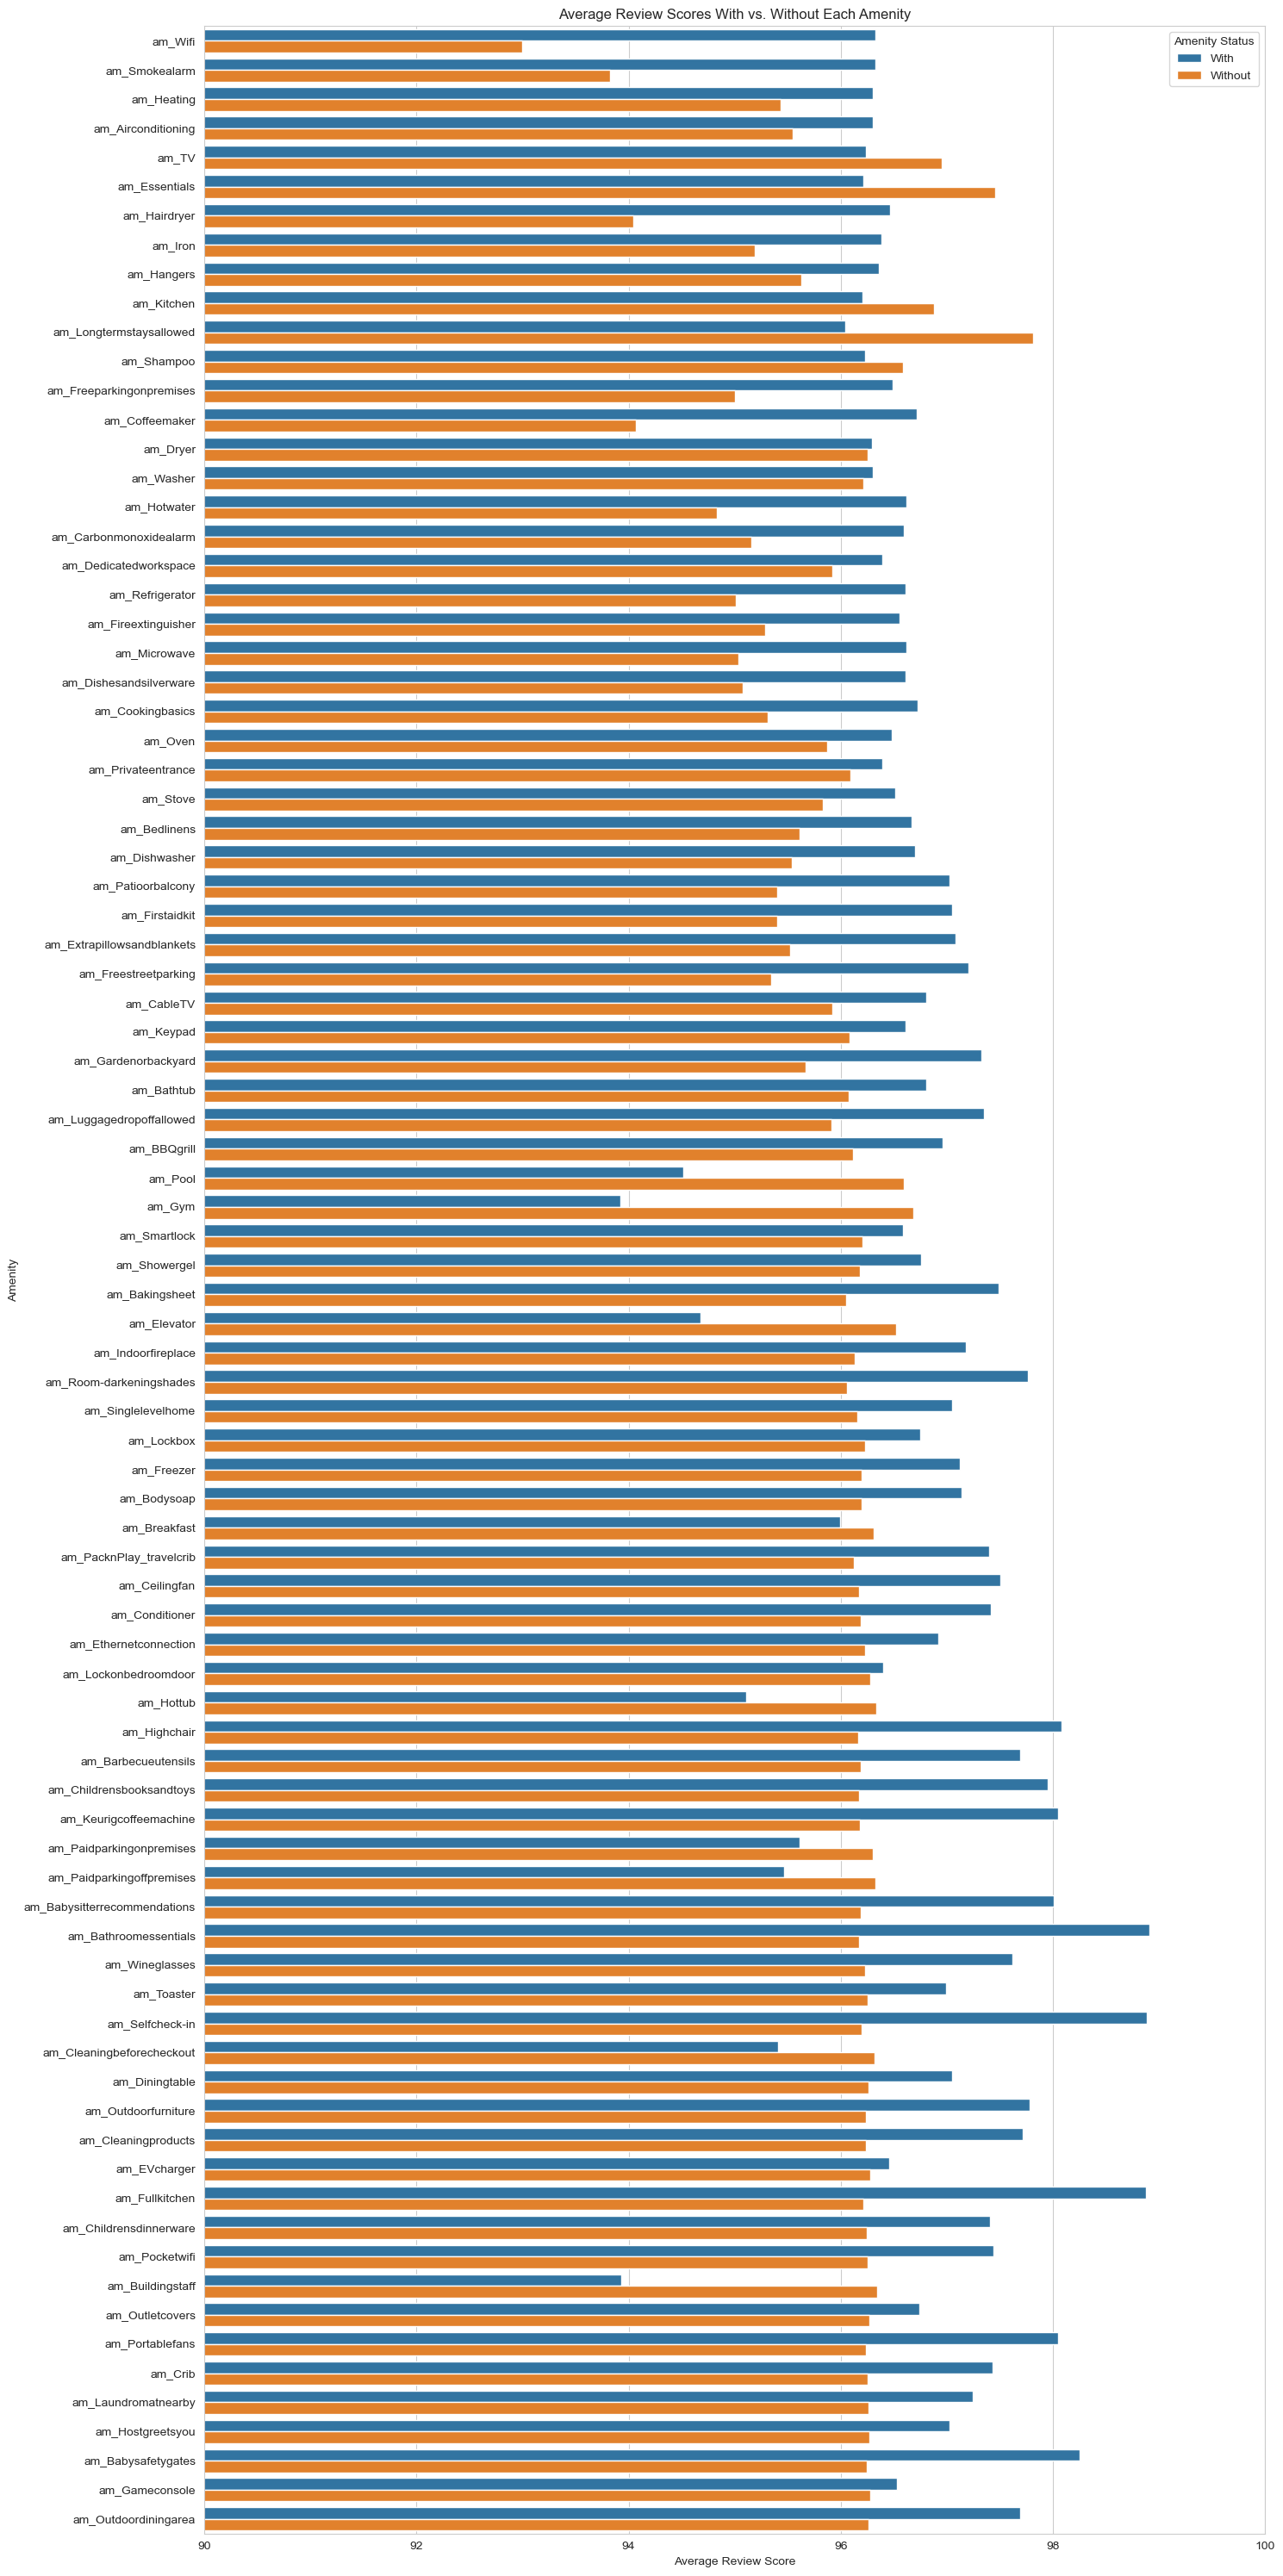

In [15]:
amenities = [
    'am_Wifi', 'am_Smokealarm', 'am_Heating', 'am_Airconditioning', 'am_TV', 'am_Essentials',
    'am_Hairdryer', 'am_Iron', 'am_Hangers', 'am_Kitchen', 'am_Longtermstaysallowed',
    'am_Shampoo', 'am_Freeparkingonpremises', 'am_Coffeemaker', 'am_Dryer', 'am_Washer',
    'am_Hotwater', 'am_Carbonmonoxidealarm', 'am_Dedicatedworkspace', 'am_Refrigerator',
    'am_Fireextinguisher', 'am_Microwave', 'am_Dishesandsilverware', 'am_Cookingbasics',
    'am_Oven', 'am_Privateentrance', 'am_Stove', 'am_Bedlinens', 'am_Dishwasher',
    'am_Patioorbalcony', 'am_Firstaidkit', 'am_Extrapillowsandblankets', 'am_Freestreetparking',
    'am_CableTV', 'am_Keypad', 'am_Gardenorbackyard', 'am_Bathtub', 'am_Luggagedropoffallowed',
    'am_BBQgrill', 'am_Pool', 'am_Gym', 'am_Smartlock', 'am_Showergel', 'am_Bakingsheet',
    'am_Elevator', 'am_Indoorfireplace', 'am_Room-darkeningshades', 'am_Singlelevelhome',
    'am_Lockbox', 'am_Freezer', 'am_Bodysoap', 'am_Breakfast','am_PacknPlay_travelcrib',
    'am_Ceilingfan', 'am_Conditioner', 'am_Ethernetconnection', 'am_Lockonbedroomdoor',
    'am_Hottub', 'am_Highchair', 'am_Barbecueutensils', 'am_Childrensbooksandtoys',
    'am_Keurigcoffeemachine', 'am_Paidparkingonpremises', 'am_Paidparkingoffpremises',
    'am_Babysitterrecommendations', 'am_Bathroomessentials', 'am_Wineglasses', 'am_Toaster',
    'am_Selfcheck-in', 'am_Cleaningbeforecheckout', 'am_Diningtable', 'am_Outdoorfurniture',
    'am_Cleaningproducts', 'am_EVcharger', 'am_Fullkitchen', 'am_Childrensdinnerware',
    'am_Pocketwifi', 'am_Buildingstaff', 'am_Outletcovers', 'am_Portablefans', 'am_Crib',
    'am_Laundromatnearby', 'am_Hostgreetsyou', 'am_Babysafetygates', 'am_Gameconsole', 'am_Outdoordiningarea'
]

amenity_scores = {}

for amenity in amenities:
    has_amenity = df_lr[df_lr[amenity] == 1]['review_scores_rating'].mean()
    no_amenity = df_lr[df_lr[amenity] == 0]['review_scores_rating'].mean()
    amenity_scores[amenity] = {'With': has_amenity, 'Without': no_amenity}
scores_df = pd.DataFrame(amenity_scores).T.melt(value_name='Review Scores', var_name='Amenity Status', ignore_index=False).reset_index()
# initialize a dictionary to store average review scores for listings with and without each amenity
# calculate average review scores
# convert the dictionary to a df

plt.figure(figsize=(15, 30))
plt.xlim(90,100)
sns.barplot(x='Review Scores', y='index', hue='Amenity Status', data=scores_df, orient='h')
plt.xlabel('Average Review Score')
plt.ylabel('Amenity')
plt.title('Average Review Scores With vs. Without Each Amenity')
plt.legend(title='Amenity Status')
plt.tight_layout()
plt.show()
# create a plot

This graph compares average review scores with and without each amenity. As expected, for most amenities, the average review score is higher with the amenity, but there are a few exceptions. The most notable exceptions are whether or not the place has a gym, pool, and elevator; this makes sense because places with these amenities usually cost much more to stay, and people generally want affordable places to stay. The most stark difference in the other direction is with and without WiFi; this especially makes sense because people (especially in our generation) are very dependent on WiFi for many general tasks and/or entertainment.

### Creating a table to show the average review score rating with and without certain amenities

In [16]:
amen_names = []
with_scores = []
without_scores = []

for amenity in amenities:
    with_score = df_lr[df_lr[amenity] == 1]['review_scores_rating'].mean()
    without_score = df_lr[df_lr[amenity] == 0]['review_scores_rating'].mean()
    
    amen_names.append(amenity.replace('am_', '').replace('_', ' ').title()) 
    with_scores.append(round(with_score, 2))
    without_scores.append(round(without_score, 2))

df_result = pd.DataFrame({
    'Amenity': amen_names,
    'Average Score (With)': with_scores,
    'Average Score (Without)': without_scores,
})

# initialize lists to store the summary data
# create for loop to calculate scores
# append the results to the lists
# create a df

# display the summary table
df_result.reset_index(drop=True, inplace=True)
print(df_result)

                      Amenity  Average Score (With)  Average Score (Without)
0                        Wifi                 96.33                    93.00
1                  Smokealarm                 96.33                    93.83
2                     Heating                 96.31                    95.43
3             Airconditioning                 96.30                    95.54
4                          Tv                 96.24                    96.95
5                  Essentials                 96.21                    97.45
6                   Hairdryer                 96.47                    94.04
7                        Iron                 96.38                    95.19
8                     Hangers                 96.36                    95.63
9                     Kitchen                 96.20                    96.88
10       Longtermstaysallowed                 96.04                    97.81
11                    Shampoo                 96.23                    96.59

## Section 5: Clean Data

In [17]:
cat_columns = ['host_neighbourhood', 'neighbourhood', 'property_type', 'room_type']
df_lr[cat_columns] = df_lr[cat_columns].fillna('Unknown')
# fill in missing values with unknown

cat_columns = ['host_neighbourhood', 'neighbourhood', 'property_type', 'room_type']

df_lr[cat_columns] = df_lr[cat_columns].fillna('Unknown')

# Create dummy variables
df_lr = pd.get_dummies(df_lr, columns=cat_columns, drop_first=True, dtype=int)
df_lr.head()

,listing_id,name,description,host_id,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,am_Wifi,am_Smokealarm,am_Heating,am_Airconditioning,am_TV,am_Essentials,am_Hairdryer,am_Iron,am_Hangers,am_Kitchen,am_Longtermstaysallowed,am_Shampoo,am_Freeparkingonpremises,am_Coffeemaker,am_Dryer,am_Washer,am_Hotwater,am_Carbonmonoxidealarm,am_Dedicatedworkspace,am_Refrigerator,am_Fireextinguisher,am_Microwave,am_Dishesandsilverware,am_Cookingbasics,am_Oven,am_Privateentrance,am_Stove,am_Bedlinens,am_Dishwasher,am_Patioorbalcony,am_Firstaidkit,am_Extrapillowsandblankets,am_Freestreetparking,am_CableTV,am_Keypad,am_Gardenorbackyard,am_Bathtub,am_Luggagedropoffallowed,am_BBQgrill,am_Pool,am_Gym,am_Smartlock,am_Showergel,am_Bakingsheet,am_Elevator,am_Indoorfireplace,am_Room-darkeningshades,am_Singlelevelhome,am_PacknPlay_travelcrib,am_Lockbox,am_Freezer,am_Bodysoap,am_Breakfast,am_Ceilingfan,am_Conditioner,am_Ethernetconnection,am_Lockonbedroomdoor,am_Childrensbooksandtoys,am_Hottub,am_Highchair,am_Barbecueutensils,am_Keurigcoffeemachine,am_Paidparkingonpremises,am_Paidparkingoffpremises,am_Babysitterrecommendations,am_Bathroomessentials,am_Bedroomcomforts,am_Wineglasses,am_Toaster,am_Selfcheck-in,am_Cleaningbeforecheckout,am_Diningtable,am_Outdoorfurniture,am_Childrensdinnerware,am_Cleaningproducts,am_EVcharger,am_Fullkitchen,am_Pocketwifi,am_Buildingstaff,am_Outletcovers,am_Portablefans,am_Crib,am_Laundromatnearby,am_Hostgreetsyou,am_Babysafetygates,am_Gameconsole,am_Outdoordiningarea,hv_None,hv_email,hv_facebook,hv_google,hv_government_id,hv_identity_manual,hv_jumio,hv_kba,hv_manual_offline,hv_manual_online,hv_offline_government_id,hv_phone,hv_photographer,hv_reviews,hv_selfie,hv_sent_id,hv_work_email,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room,dist_1,dist_10,dist_11,dist_12,dist_13,dist_14,dist_15,dist_16,dist_17,dist_18,dist_19,dist_2,dist_20,dist_21,dist_22,dist_23,dist_24,dist_25,dist_26,dist_27,dist_28,dist_29,dist_3,dist_30,dist_31,dist_32,dist_33,dist_34,dist_35,dist_4,dist_5,dist_6,dist_7,dist_8,dist_9,response_few_days,response_few_hours,response_within_day,response_within_hour,host_local,host_neighbourhood_Acklen Westgrove,host_neighbourhood_Antioch,host_neighbourhood_Arts District,host_neighbourhood_Bay Ho,host_neighbourhood_Beacon Square,host_neighbourhood_Bellehaven,host_neighbourhood_Bellevue,host_neighbourhood_Bellshire Terrace,host_neighbourhood_Belmont/Hillsboro,host_neighbourhood_Bixby Knolls,host_neighbourhood_Bluefields,host_neighbourhood_Bordeaux Area,host_neighbourhood_Buckroe Beach,host_neighbourhood_Cannonborough Elliotborough,host_neighbourhood_Capitol Hill,host_neighbourhood_Carmel Arts & Design District,host_neighbourhood_Center City,host_neighbourhood_Central Business District,host_neighbourhood_Central Dallas,host_neighbourhood_Central LA,host_neighbourhood_Champs-Elysées,host_neighbourhood_Chapel,host_neighbourhood_Charlotte Park,host_neighbourhood_Chestnut Hill,host_neighbourhood_Chicago Loop,host_neighbourhood_City Center,host_neighbourhood_Ciudad Cariari,host_neighbourhood_Clearwater Beach,host_neighbourhood_Clifton/Southwest,host_neighbourhood_Cloverhill,host_neighbourhood_College Heights/Clifton,host_neighbourhood_Conservatory,host_neighbourhood_Cr

In [18]:
df_lr["host_response_rate"] = pd.to_numeric(df_lr["host_response_rate"].str.replace("%", ""))
df_lr["host_acceptance_rate"] = pd.to_numeric(df_lr["host_acceptance_rate"].str.replace("%", ""))

In [19]:
df_lr = df_lr.select_dtypes(exclude=['object'])
df_lr = df_lr.drop("host_id", axis = 1)

In [20]:
df_lr["host_response_rate"] = df_lr["host_response_rate"].fillna(df_lr["host_response_rate"].mean())
df_lr["host_acceptance_rate"] = df_lr["host_acceptance_rate"].fillna(df_lr["host_acceptance_rate"].mean())

In [21]:
df_lr.head()

,listing_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,am_Wifi,am_Smokealarm,am_Heating,am_Airconditioning,am_TV,am_Essentials,am_Hairdryer,am_Iron,am_Hangers,am_Kitchen,am_Longtermstaysallowed,am_Shampoo,am_Freeparkingonpremises,am_Coffeemaker,am_Dryer,am_Washer,am_Hotwater,am_Carbonmonoxidealarm,am_Dedicatedworkspace,am_Refrigerator,am_Fireextinguisher,am_Microwave,am_Dishesandsilverware,am_Cookingbasics,am_Oven,am_Privateentrance,am_Stove,am_Bedlinens,am_Dishwasher,am_Patioorbalcony,am_Firstaidkit,am_Extrapillowsandblankets,am_Freestreetparking,am_CableTV,am_Keypad,am_Gardenorbackyard,am_Bathtub,am_Luggagedropoffallowed,am_BBQgrill,am_Pool,am_Gym,am_Smartlock,am_Showergel,am_Bakingsheet,am_Elevator,am_Indoorfireplace,am_Room-darkeningshades,am_Singlelevelhome,am_PacknPlay_travelcrib,am_Lockbox,am_Freezer,am_Bodysoap,am_Breakfast,am_Ceilingfan,am_Conditioner,am_Ethernetconnection,am_Lockonbedroomdoor,am_Childrensbooksandtoys,am_Hottub,am_Highchair,am_Barbecueutensils,am_Keurigcoffeemachine,am_Paidparkingonpremises,am_Paidparkingoffpremises,am_Babysitterrecommendations,am_Bathroomessentials,am_Bedroomcomforts,am_Wineglasses,am_Toaster,am_Selfcheck-in,am_Cleaningbeforecheckout,am_Diningtable,am_Outdoorfurniture,am_Childrensdinnerware,am_Cleaningproducts,am_EVcharger,am_Fullkitchen,am_Pocketwifi,am_Buildingstaff,am_Outletcovers,am_Portablefans,am_Crib,am_Laundromatnearby,am_Hostgreetsyou,am_Babysafetygates,am_Gameconsole,am_Outdoordiningarea,hv_None,hv_email,hv_facebook,hv_google,hv_government_id,hv_identity_manual,hv_jumio,hv_kba,hv_manual_offline,hv_manual_online,hv_offline_government_id,hv_phone,hv_photographer,hv_reviews,hv_selfie,hv_sent_id,hv_work_email,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room,dist_1,dist_10,dist_11,dist_12,dist_13,dist_14,dist_15,dist_16,dist_17,dist_18,dist_19,dist_2,dist_20,dist_21,dist_22,dist_23,dist_24,dist_25,dist_26,dist_27,dist_28,dist_29,dist_3,dist_30,dist_31,dist_32,dist_33,dist_34,dist_35,dist_4,dist_5,dist_6,dist_7,dist_8,dist_9,response_few_days,response_few_hours,response_within_day,response_within_hour,host_local,host_neighbourhood_Acklen Westgrove,host_neighbourhood_Antioch,host_neighbourhood_Arts District,host_neighbourhood_Bay Ho,host_neighbourhood_Beacon Square,host_neighbourhood_Bellehaven,host_neighbourhood_Bellevue,host_neighbourhood_Bellshire Terrace,host_neighbourhood_Belmont/Hillsboro,host_neighbourhood_Bixby Knolls,host_neighbourhood_Bluefields,host_neighbourhood_Bordeaux Area,host_neighbourhood_Buckroe Beach,host_neighbourhood_Cannonborough Elliotborough,host_neighbourhood_Capitol Hill,host_neighbourhood_Carmel Arts & Design District,host_neighbourhood_Center City,host_neighbourhood_Central Business District,host_neighbourhood_Central Dallas,host_neighbourhood_Central LA,host_neighbourhood_Champs-Elysées,host_neighbourhood_Chapel,host_neighbourhood_Charlotte Park,host_neighbourhood_Chestnut Hill,host_neighbourhood_Chicago Loop,host_neighbourhood_City Center,host_neighbourhood_Ciudad Cariari,host_neighbourhood_Clearwater Beach,host_neighbourhood_Clifton/Southwest,host_neighbourhood_Cloverhill,host_neighbourhood_College Heights/Clifton,host_neighbourhood_Conservatory,host_neighbourhood_Craigmeade,host_neighbourhood_Culver 

## Section 6: Create Model Predicting price

In [22]:
X = df_lr.drop(["price"], axis = 1)
y = df_lr["price"]

In [23]:
X.head()

,listing_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,am_Wifi,am_Smokealarm,am_Heating,am_Airconditioning,am_TV,am_Essentials,am_Hairdryer,am_Iron,am_Hangers,am_Kitchen,am_Longtermstaysallowed,am_Shampoo,am_Freeparkingonpremises,am_Coffeemaker,am_Dryer,am_Washer,am_Hotwater,am_Carbonmonoxidealarm,am_Dedicatedworkspace,am_Refrigerator,am_Fireextinguisher,am_Microwave,am_Dishesandsilverware,am_Cookingbasics,am_Oven,am_Privateentrance,am_Stove,am_Bedlinens,am_Dishwasher,am_Patioorbalcony,am_Firstaidkit,am_Extrapillowsandblankets,am_Freestreetparking,am_CableTV,am_Keypad,am_Gardenorbackyard,am_Bathtub,am_Luggagedropoffallowed,am_BBQgrill,am_Pool,am_Gym,am_Smartlock,am_Showergel,am_Bakingsheet,am_Elevator,am_Indoorfireplace,am_Room-darkeningshades,am_Singlelevelhome,am_PacknPlay_travelcrib,am_Lockbox,am_Freezer,am_Bodysoap,am_Breakfast,am_Ceilingfan,am_Conditioner,am_Ethernetconnection,am_Lockonbedroomdoor,am_Childrensbooksandtoys,am_Hottub,am_Highchair,am_Barbecueutensils,am_Keurigcoffeemachine,am_Paidparkingonpremises,am_Paidparkingoffpremises,am_Babysitterrecommendations,am_Bathroomessentials,am_Bedroomcomforts,am_Wineglasses,am_Toaster,am_Selfcheck-in,am_Cleaningbeforecheckout,am_Diningtable,am_Outdoorfurniture,am_Childrensdinnerware,am_Cleaningproducts,am_EVcharger,am_Fullkitchen,am_Pocketwifi,am_Buildingstaff,am_Outletcovers,am_Portablefans,am_Crib,am_Laundromatnearby,am_Hostgreetsyou,am_Babysafetygates,am_Gameconsole,am_Outdoordiningarea,hv_None,hv_email,hv_facebook,hv_google,hv_government_id,hv_identity_manual,hv_jumio,hv_kba,hv_manual_offline,hv_manual_online,hv_offline_government_id,hv_phone,hv_photographer,hv_reviews,hv_selfie,hv_sent_id,hv_work_email,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room,dist_1,dist_10,dist_11,dist_12,dist_13,dist_14,dist_15,dist_16,dist_17,dist_18,dist_19,dist_2,dist_20,dist_21,dist_22,dist_23,dist_24,dist_25,dist_26,dist_27,dist_28,dist_29,dist_3,dist_30,dist_31,dist_32,dist_33,dist_34,dist_35,dist_4,dist_5,dist_6,dist_7,dist_8,dist_9,response_few_days,response_few_hours,response_within_day,response_within_hour,host_local,host_neighbourhood_Acklen Westgrove,host_neighbourhood_Antioch,host_neighbourhood_Arts District,host_neighbourhood_Bay Ho,host_neighbourhood_Beacon Square,host_neighbourhood_Bellehaven,host_neighbourhood_Bellevue,host_neighbourhood_Bellshire Terrace,host_neighbourhood_Belmont/Hillsboro,host_neighbourhood_Bixby Knolls,host_neighbourhood_Bluefields,host_neighbourhood_Bordeaux Area,host_neighbourhood_Buckroe Beach,host_neighbourhood_Cannonborough Elliotborough,host_neighbourhood_Capitol Hill,host_neighbourhood_Carmel Arts & Design District,host_neighbourhood_Center City,host_neighbourhood_Central Business District,host_neighbourhood_Central Dallas,host_neighbourhood_Central LA,host_neighbourhood_Champs-Elysées,host_neighbourhood_Chapel,host_neighbourhood_Charlotte Park,host_neighbourhood_Chestnut Hill,host_neighbourhood_Chicago Loop,host_neighbourhood_City Center,host_neighbourhood_Ciudad Cariari,host_neighbourhood_Clearwater Beach,host_neighbourhood_Clifton/Southwest,host_neighbourhood_Cloverhill,host_neighbourhood_College Heights/Clifton,host_neighbourhood_Conservatory,host_neighbourhood_Craigmeade,host_neighbourhood_Culver City,h

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

sc = preprocessing.StandardScaler()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

In [26]:
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

### Section 6.1: Linear Regression Model

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_linear_pred = model_linear.predict(X_test)
df_linear_pred = pd.DataFrame(y_linear_pred, columns = ['linear_pred'])
df_scores = pd.DataFrame(y_test).reset_index()
df_results = pd.concat([df_scores, df_linear_pred], axis=1)
df_results['linear_resid'] = df_results['price'] - df_results['linear_pred']
display(df_results)

,index,price,linear_pred,linear_resid
0,4166,283.0,79.187765,203.812235
1,4873,125.0,-166.670053,291.670053
2,1566,532.0,415.597690,116.402310
3,2551,107.0,30.863661,76.136339
4,2462,181.0,393.607858,-212.607858
...,...,...,...,...
1532,2949,197.0,311.026513,-114.026513
1533,820,341.0,418.663209,-77.663209
1534,108,102.0,98.677843,3.322157
1535,4628,137.0,149.016514,-12.016514


In [28]:
model_linear.score(X_test, y_test)

0.35041846043942715

### Section 6.2: Lasso Regression Model

iteration 0.35 done
iteration 0.36 done
iteration 0.37 done
iteration 0.38 done
iteration 0.39 done
iteration 0.4 done
iteration 0.41 done
iteration 0.42 done
iteration 0.43 done
iteration 0.44 done


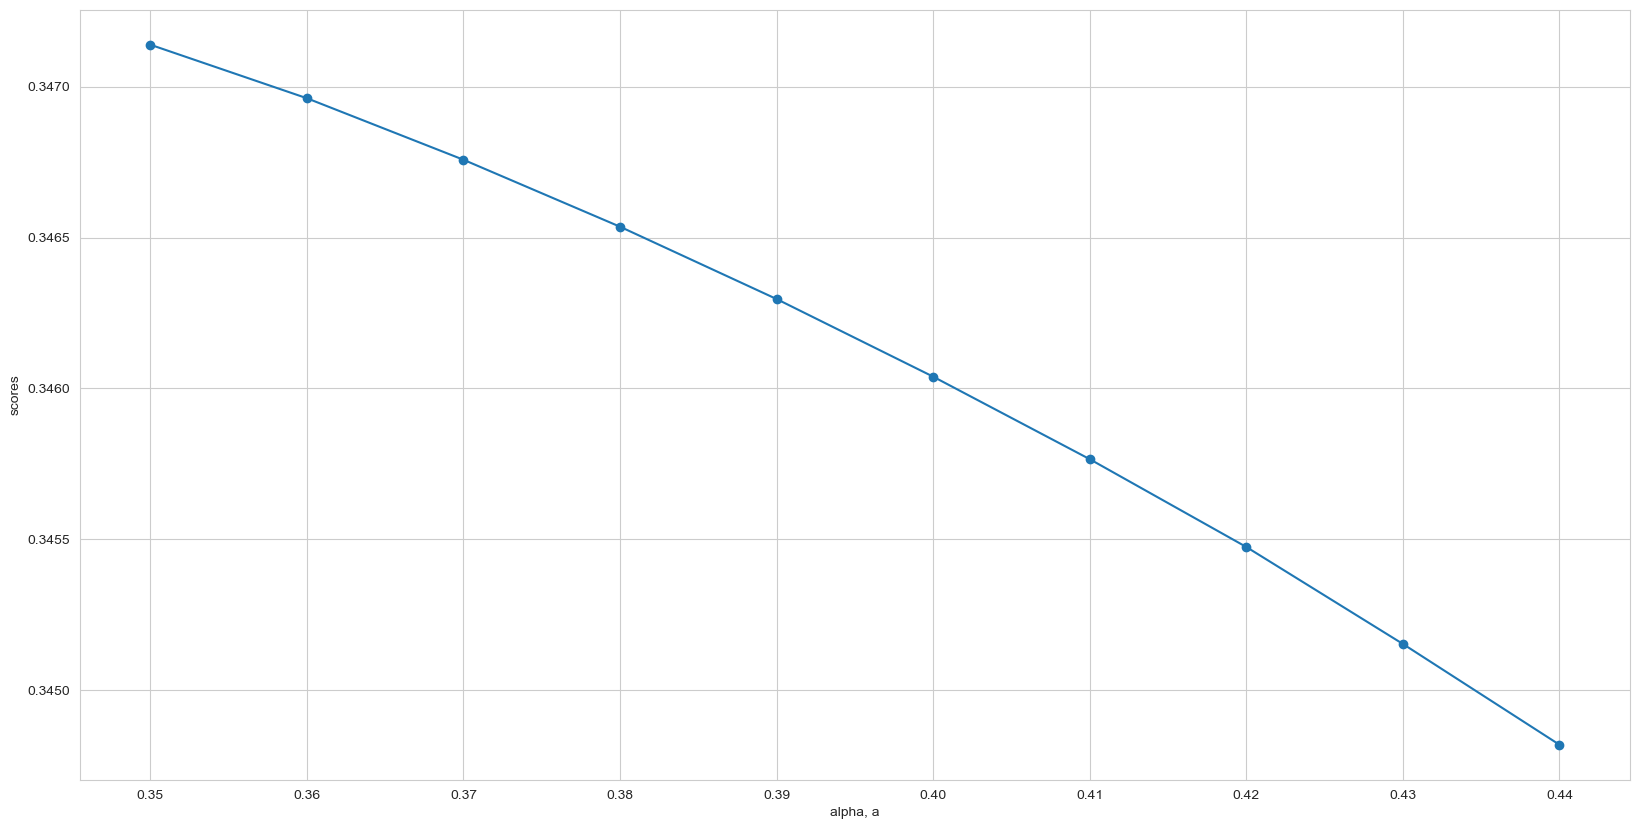

In [29]:
X_train = X_train_sc
X_test = X_test_sc
plt.figure(figsize=(20,10))
alphas = [.35, .36, .37, .38, .39, .4, .41, .42, .43, .44]
scores = []
for a in alphas:
    lasso = Lasso(alpha = a, fit_intercept=True, max_iter = 3000)
    lasso.fit(X_train, y_train)
    scores.append(lasso.score(X_test, y_test))
    print("iteration {} done".format(a))
plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()

In [30]:
X_train = X_train_sc
X_test = X_test_sc
lasso = Lasso(alpha=.39, fit_intercept=True, max_iter=3000)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print ('Lasso R Sq. Score ---------')
print ('')
print (lasso.score(X_test, y_test))
print('')
print ('---------------------------')
df_lasso = pd.DataFrame(lasso.coef_)
names = pd.DataFrame(list(X.columns))
df_lasso = pd.concat([names, df_lasso], axis = 1)
df_lasso.columns = ['Feature', 'lasso_coeff']
df_lasso = df_lasso.sort_values(by='lasso_coeff', ascending = False)
df_lasso

Lasso R Sq. Score ---------

0.3533423137445454

---------------------------


,Feature,lasso_coeff
403,property_type_Room in boutique hotel,5.791435e+02
406,property_type_Room in serviced apartment,2.107447e+02
37,calculated_host_listings_count_private_rooms,1.994804e+02
152,dist_13,1.920419e+02
144,room_Entire home/apt,1.403792e+02
331,host_neighbourhood_Unknown,1.100441e+02
79,am_Pool,9.945248e+01
12,bathrooms,9.414464e+01
402,property_type_Room in bed and breakfast,7.720382e+01
184,response_few_hours,7.253235e+01


In [31]:
df_lasso_pred = pd.DataFrame(lasso_pred, columns = ['lasso_pred'])
df_results = pd.concat([df_results, df_lasso_pred], axis=1)
df_results['lasso_resid'] = df_results['price'] - df_results['lasso_pred']
df_results

,index,price,linear_pred,linear_resid,lasso_pred,lasso_resid
0,4166,283.0,79.187765,203.812235,86.004735,196.995265
1,4873,125.0,-166.670053,291.670053,-160.319301,285.319301
2,1566,532.0,415.597690,116.402310,405.387404,126.612596
3,2551,107.0,30.863661,76.136339,32.698264,74.301736
4,2462,181.0,393.607858,-212.607858,376.858971,-195.858971
...,...,...,...,...,...,...
1532,2949,197.0,311.026513,-114.026513,313.179624,-116.179624
1533,820,341.0,418.663209,-77.663209,410.429541,-69.429541
1534,108,102.0,98.677843,3.322157,102.108833,-0.108833
1535,4628,137.0,149.016514,-12.016514,165.259527,-28.259527


### Section 6.3: Ridge Regression Model

iteration 64 done
iteration 65 done
iteration 66 done
iteration 67 done
iteration 68 done


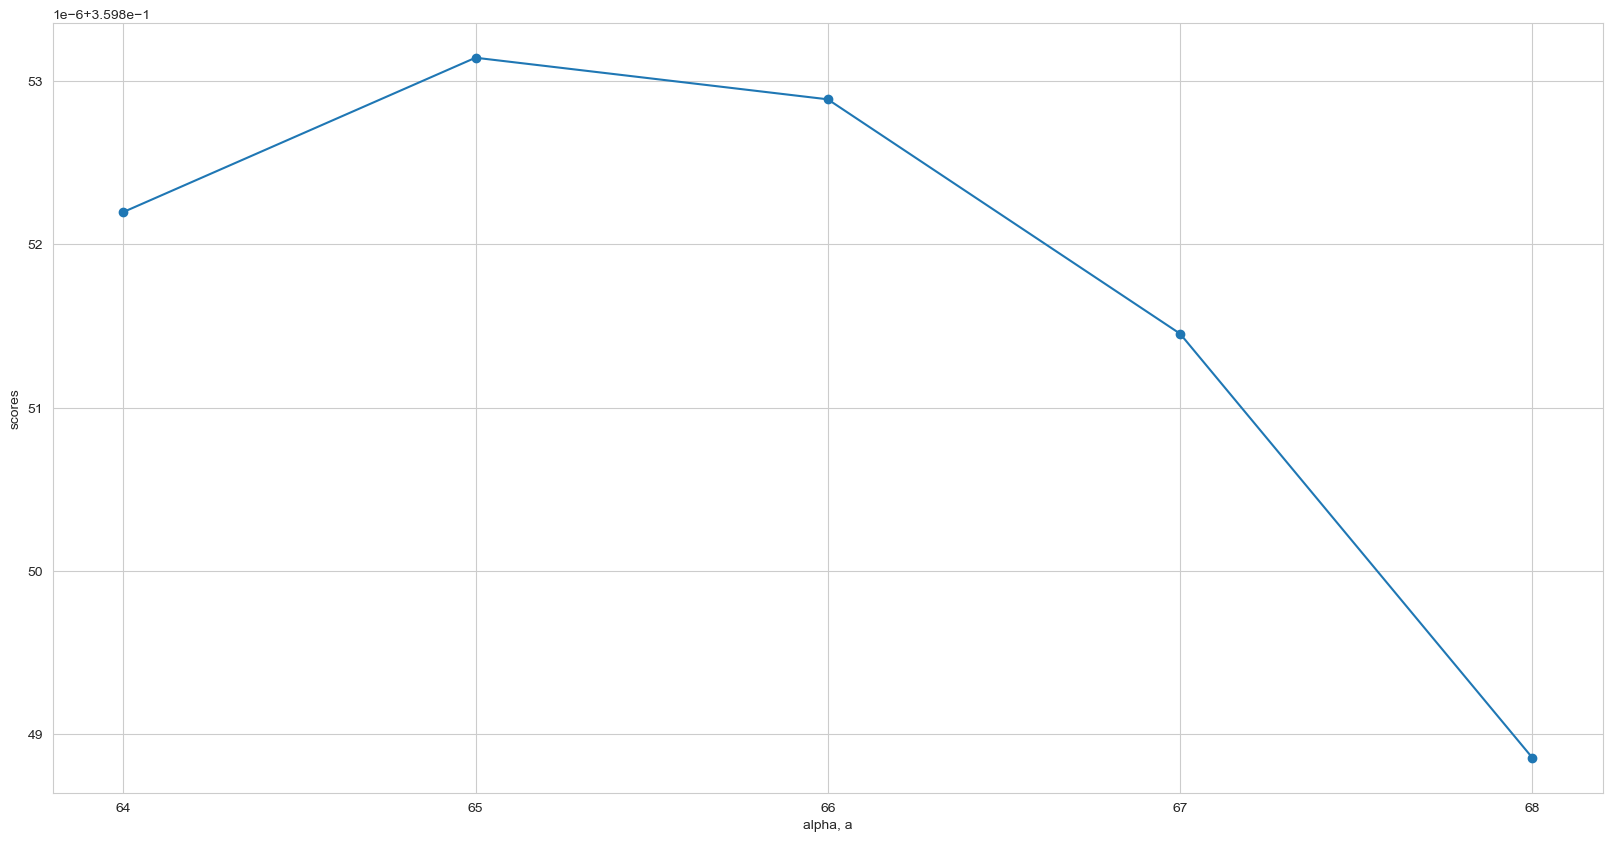

In [32]:
X_train = X_train_sc
X_test = X_test_sc
plt.figure(figsize=(20,10))
alphas = [64, 65, 66, 67, 68]
scores = []
for a in alphas:
    ridge = Ridge(alpha = a, fit_intercept=True)
    ridge.fit(X_train, y_train)
    scores.append(ridge.score(X_test, y_test))
    print("iteration {} done".format(a))
plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()

In [33]:
ridge = Ridge(alpha=65, fit_intercept=True,  max_iter=3000)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
df_ridge_pred = pd.DataFrame(ridge_pred, columns = ['ridge_pred'])
df_target = pd.DataFrame(y_test).reset_index()
df_ridge = pd.DataFrame(ridge.coef_)
names = pd.DataFrame(list(X.columns))
df_ridge = pd.concat([names, df_ridge], axis = 1)
df_ridge.columns = ['Feature', 'ridge_coeff']
df_ridge = df_ridge.sort_values(by='ridge_coeff', ascending = False)
df_ridge

,Feature,ridge_coeff
403,property_type_Room in boutique hotel,454.860813
37,calculated_host_listings_count_private_rooms,193.155618
152,dist_13,173.139695
406,property_type_Room in serviced apartment,159.643975
331,host_neighbourhood_Unknown,102.855971
79,am_Pool,93.710448
12,bathrooms,90.145941
184,response_few_hours,72.652953
96,am_Lockonbedroomdoor,70.734117
23,number_of_reviews_ltm,66.796238


In [34]:
df_results = pd.concat([df_results, df_ridge_pred], axis=1)
df_results['ridge_resid'] = df_results['price'] - df_results['ridge_pred']
df_results

,index,price,linear_pred,linear_resid,lasso_pred,lasso_resid,ridge_pred,ridge_resid
0,4166,283.0,79.187765,203.812235,86.004735,196.995265,95.512325,187.487675
1,4873,125.0,-166.670053,291.670053,-160.319301,285.319301,-113.020402,238.020402
2,1566,532.0,415.597690,116.402310,405.387404,126.612596,401.278597,130.721403
3,2551,107.0,30.863661,76.136339,32.698264,74.301736,23.980252,83.019748
4,2462,181.0,393.607858,-212.607858,376.858971,-195.858971,369.537622,-188.537622
...,...,...,...,...,...,...,...,...
1532,2949,197.0,311.026513,-114.026513,313.179624,-116.179624,321.357208,-124.357208
1533,820,341.0,418.663209,-77.663209,410.429541,-69.429541,397.632746,-56.632746
1534,108,102.0,98.677843,3.322157,102.108833,-0.108833,98.402057,3.597943
1535,4628,137.0,149.016514,-12.016514,165.259527,-28.259527,169.064053,-32.064053


In [35]:
df_resid_melt = pd.melt(df_results, id_vars=['index'], \
                 value_vars=['ridge_resid', 'linear_resid', 'lasso_resid'])
df_resid_melt=df_resid_melt.rename(columns = {'value':'Residual'})
df_pred_melt = pd.melt(df_results, id_vars=['index', 'price'], \
                 value_vars=['ridge_pred', 'linear_pred', 'lasso_pred'])
df_pred_melt=df_pred_melt.rename(columns = {'variable': 'Reg_Type', 'value':'Prediction'})
df_pred_melt['Reg_Type'] = df_pred_melt.Reg_Type.str.replace('_pred', '')
df_pred_resid = pd.concat([df_pred_melt, df_resid_melt['Residual']], axis=1)
df_pred_resid

,index,price,Reg_Type,Prediction,Residual
0,4166,283.0,ridge,95.512325,187.487675
1,4873,125.0,ridge,-113.020402,238.020402
2,1566,532.0,ridge,401.278597,130.721403
3,2551,107.0,ridge,23.980252,83.019748
4,2462,181.0,ridge,369.537622,-188.537622
...,...,...,...,...,...
4606,2949,197.0,lasso,313.179624,-116.179624
4607,820,341.0,lasso,410.429541,-69.429541
4608,108,102.0,lasso,102.108833,-0.108833
4609,4628,137.0,lasso,165.259527,-28.259527


In [36]:
df_results['ridge_resid_abs'] = abs(df_results['ridge_resid'])
df_results['linreg_resid_abs'] = abs(df_results['linear_resid'])
df_results['lasso_resid_abs'] = abs(df_results['lasso_resid'])
df_results

,index,price,linear_pred,linear_resid,lasso_pred,lasso_resid,ridge_pred,ridge_resid,ridge_resid_abs,linreg_resid_abs,lasso_resid_abs
0,4166,283.0,79.187765,203.812235,86.004735,196.995265,95.512325,187.487675,187.487675,203.812235,196.995265
1,4873,125.0,-166.670053,291.670053,-160.319301,285.319301,-113.020402,238.020402,238.020402,291.670053,285.319301
2,1566,532.0,415.597690,116.402310,405.387404,126.612596,401.278597,130.721403,130.721403,116.402310,126.612596
3,2551,107.0,30.863661,76.136339,32.698264,74.301736,23.980252,83.019748,83.019748,76.136339,74.301736
4,2462,181.0,393.607858,-212.607858,376.858971,-195.858971,369.537622,-188.537622,188.537622,212.607858,195.858971
...,...,...,...,...,...,...,...,...,...,...,...
1532,2949,197.0,311.026513,-114.026513,313.179624,-116.179624,321.357208,-124.357208,124.357208,114.026513,116.179624
1533,820,341.0,418.663209,-77.663209,410.429541,-69.429541,397.632746,-56.632746,56.632746,77.663209,69.429541
1534,108,102.0,98.677843,3.322157,102.108833,-0.108833,98.402057,3.597943,3.597943,3.322157,0.108833
1535,4628,137.0,149.016514,-12.016514,165.259527,-28.259527,169.064053,-32.064053,32.064053,12.016514,28.259527


In [37]:
df_results_T = df_results[['ridge_resid_abs', 'linreg_resid_abs', 'lasso_resid_abs']].T
minResid = df_results_T.min()
minResid = pd.DataFrame(minResid.T, columns = ['resid_min'])
df_results = pd.concat([df_results, minResid], axis=1)
df_results.head(10)

,index,price,linear_pred,linear_resid,lasso_pred,lasso_resid,ridge_pred,ridge_resid,ridge_resid_abs,linreg_resid_abs,lasso_resid_abs,resid_min
0,4166,283.0,79.187765,203.812235,86.004735,196.995265,95.512325,187.487675,187.487675,203.812235,196.995265,187.487675
1,4873,125.0,-166.670053,291.670053,-160.319301,285.319301,-113.020402,238.020402,238.020402,291.670053,285.319301,238.020402
2,1566,532.0,415.597690,116.402310,405.387404,126.612596,401.278597,130.721403,130.721403,116.402310,126.612596,116.402310
3,2551,107.0,30.863661,76.136339,32.698264,74.301736,23.980252,83.019748,83.019748,76.136339,74.301736,74.301736
4,2462,181.0,393.607858,-212.607858,376.858971,-195.858971,369.537622,-188.537622,188.537622,212.607858,195.858971,188.537622
5,4249,78.0,191.194682,-113.194682,169.731335,-91.731335,188.291968,-110.291968,110.291968,113.194682,91.731335,91.731335
6,4949,282.0,322.325680,-40.325680,332.708956,-50.708956,338.725471,-56.725471,56.725471,40.325680,50.708956,40.325680
7,4206,514.0,544.009761,-30.009761,547.591352,-33.591352,576.340892,-62.340892,62.340892,30.009761,33.591352,30.009761
8,5021,79.0,89.741881,-10.741881,90.845251,-11.845251,96.337824,-17.337824,17.337824,10.741881,11.845251,10.741881
9,1447,158.0,-256.478212,414.478212,-206.176497,364.176497,-211.406813,369.406813,369.406813,414.478212,364.176497,364.176497


In [38]:
def bestreg(c):
  if c['ridge_resid_abs'] == c['resid_min'] :
    return 'Ridge'
  elif c['linreg_resid_abs'] == c['resid_min'] :
    return 'Linear'
  else: 
    return 'Lasso'
df_results['best_reg'] = df_results.apply(bestreg, axis=1)
df_results

,index,price,linear_pred,linear_resid,lasso_pred,lasso_resid,ridge_pred,ridge_resid,ridge_resid_abs,linreg_resid_abs,lasso_resid_abs,resid_min,best_reg
0,4166,283.0,79.187765,203.812235,86.004735,196.995265,95.512325,187.487675,187.487675,203.812235,196.995265,187.487675,Ridge
1,4873,125.0,-166.670053,291.670053,-160.319301,285.319301,-113.020402,238.020402,238.020402,291.670053,285.319301,238.020402,Ridge
2,1566,532.0,415.597690,116.402310,405.387404,126.612596,401.278597,130.721403,130.721403,116.402310,126.612596,116.402310,Linear
3,2551,107.0,30.863661,76.136339,32.698264,74.301736,23.980252,83.019748,83.019748,76.136339,74.301736,74.301736,Lasso
4,2462,181.0,393.607858,-212.607858,376.858971,-195.858971,369.537622,-188.537622,188.537622,212.607858,195.858971,188.537622,Ridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,2949,197.0,311.026513,-114.026513,313.179624,-116.179624,321.357208,-124.357208,124.357208,114.026513,116.179624,114.026513,Linear
1533,820,341.0,418.663209,-77.663209,410.429541,-69.429541,397.632746,-56.632746,56.632746,77.663209,69.429541,56.632746,Ridge
1534,108,102.0,98.677843,3.322157,102.108833,-0.108833,98.402057,3.597943,3.597943,3.322157,0.108833,0.108833,Lasso
1535,4628,137.0,149.016514,-12.016514,165.259527,-28.259527,169.064053,-32.064053,32.064053,12.016514,28.259527,12.016514,Linear


In [39]:
df_best_reg = pd.DataFrame(df_results['best_reg'].value_counts())
df_best_reg.columns = ['best_reg']


In [40]:
print(df_best_reg.columns)

Index(['best_reg'], dtype='object')


In [41]:
#df_best_reg = df_best_reg.rename(columns={'index':'actual'})
#df_best_reg.info()

In [42]:
print(df_best_reg.columns)


Index(['best_reg'], dtype='object')


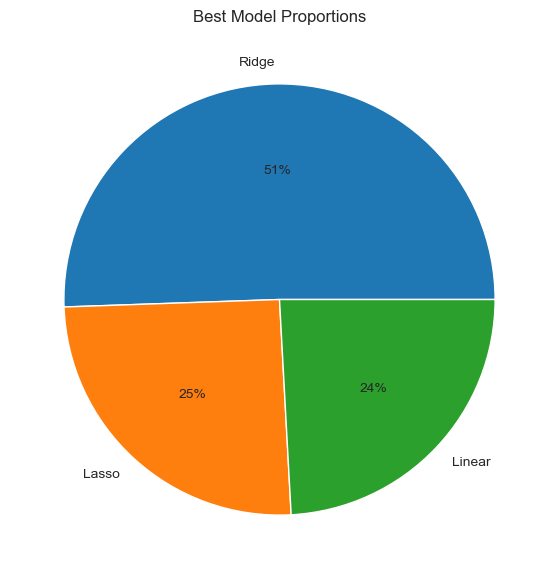

In [43]:
labels = ["Ridge", "Lasso", "Linear"]
fig = plt.figure(figsize = (10, 7))
plt.pie(df_best_reg["best_reg"], labels = labels, autopct='%1.0f%%',)
plt.title("Best Model Proportions")
plt.show()

This pie chart looks at the proportion of observations where each model is the best model. For over half of the observations, the ridge regression model is the best, so it is clear that the ridge model should be used in this analysis.

In [44]:
ridge = Ridge(alpha=65, fit_intercept=True,  max_iter=3000)
ridge.fit(X, y)
ridge_pred = ridge.predict(X)
df_ridge = pd.DataFrame(ridge.coef_)
names = pd.DataFrame(list(X.columns))
df_ridge = pd.concat([names, df_ridge], axis = 1)
df_ridge.columns = ['Feature', 'ridge_coeff']
df_ridge = df_ridge.sort_values(by='ridge_coeff', ascending = False)
display(df_ridge.head(10))
display(df_ridge.tail(10))

,Feature,ridge_coeff
403,property_type_Room in boutique hotel,1006.750524
152,dist_13,585.784929
96,am_Lockonbedroomdoor,285.521011
184,response_few_hours,280.177783
79,am_Pool,183.371539
44,am_TV,173.616981
169,dist_29,163.592165
8,host_identity_verified,137.908927
37,calculated_host_listings_count_private_rooms,136.403650
121,am_Crib,127.080997


,Feature,ridge_coeff
385,property_type_Private room in apartment,-132.498040
399,property_type_Private room in townhouse,-138.045249
320,host_neighbourhood_South Nashville,-146.016030
48,am_Hangers,-170.686248
49,am_Kitchen,-172.910741
118,am_Buildingstaff,-186.770619
395,property_type_Private room in house,-268.570202
43,am_Airconditioning,-293.700171
42,am_Heating,-300.613429
405,property_type_Room in hotel,-309.640830


In [45]:
from statsmodels.tools.tools import pinv_extended
import statsmodels.api as sm
import sklearn, statsmodels

def regression_analysis(X, y, model):
    
    is_statsmodels = False
    is_sklearn = False
    
    # check for accepted linear models
    if type(model) in [sklearn.linear_model._base.LinearRegression,
                       sklearn.linear_model._ridge.Ridge,
                       sklearn.linear_model._ridge.RidgeCV,
                       sklearn.linear_model._coordinate_descent.Lasso,
                       sklearn.linear_model._coordinate_descent.LassoCV,
                       sklearn.linear_model._coordinate_descent.ElasticNet,
                       sklearn.linear_model._coordinate_descent.ElasticNetCV,
                      ]:
        is_sklearn = True
    elif type(model) in [statsmodels.regression.linear_model.OLS, 
                         statsmodels.base.elastic_net.RegularizedResults,
                        ]:
        is_statsmodels = True
    else:
        print("Only linear models are supported!")
        return None
    
    
    
    has_intercept = False
    
    if is_statsmodels and all(np.array(X)[:,0]==1):
        # statsmodels add_constant has been used already
        has_intercept = True  
    elif is_sklearn and model.intercept_:
        has_intercept = True
        

    
    if is_statsmodels:
        # add_constant has been used already
        x = X
        model_params = model.params
    else: # sklearn model
        if has_intercept:
            x = sm.add_constant(X)
            model_params = np.hstack([np.array([model.intercept_]), model.coef_])
        else:
            x = X
            model_params = model.coef_
        
    #y = np.array(y).ravel()
    
    # define the OLS model
    olsModel = sm.OLS(y, x)
    
    pinv_wexog,_ = pinv_extended(x)
    normalized_cov_params = np.dot(pinv_wexog, np.transpose(pinv_wexog))
    
    
    return sm.regression.linear_model.OLSResults(olsModel, model_params, normalized_cov_params)
result = regression_analysis(X, y, ridge)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     4.010
Date:                Sat, 24 Feb 2024   Prob (F-statistic):          3.55e-118
Time:                        14:33:11   Log-Likelihood:                -40814.
No. Observations:                5122   AIC:                         8.244e+04
Df Residuals:                    4715   BIC:                         8.511e+04
Df Model:                         406                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                        2215.4599   5.88e+04      0.038      0.970   -1.13e+05    1.17e+05
listing_id                                                  -4.624e-06   3.28e-06     -1.409      0.159   -1.11e-05    1.81e-06
host_since                                                     -0.0182      0.023     -0.806      0.420      -0.063       0.026
host_response_rate                                              0.5743      2.542      0.226      0.821      -4.409       5.558
host_acceptance_rate                                            0.5493      1.006      0.546      0.585      -1.423       2.521
host_is_superhost                                             -35.8463     29.337     -1.222      0.222     -93.361      21.669
host_listings_count                                            -0.0479      0.081     -0.591      0.555      -0.207       0.111
host_total_listings_count                                      -0.0479      0.081     -0.591      0.555      -0.207       0.111
host_has_profile_pic                                            9.0791    400.076      0.023      0.982    -775.256     793.415
host_identity_verified                                        137.9089     43.036      3.205      0.001      53.539     222.279
latitude                                                       -0.5342    891.319     -0.001      1.000   -1747.935    1746.867
longitude                                                      24.6643    880.632      0.028      0.978   -1701.787    1751.115
accommodates                                                   -2.4375      7.955     -0.306      0.759     -18.034      13.159
bathrooms                                                      63.1574     20.472      3.085      0.002      23.023     103.292
bedrooms                                                       59.3354     22.915      2.589      0.010      14.411     104.260
beds                                                           10.0291      6.957      1.442      0.149      -3.610      23.668
minimum_nights                                                 -2.1262      1.022     -2.080      0.038      -4.130      -0.122
maximum_nights                                                 -0.0657      0.026     -2.545      0.011      -0.116      -0.015
has_availability                                                2.9885    213.982      0.014      0.989    -416.516     422.493
availability_30                                                 2.3854      3.548      0.672      0.501      -4.570       9.341
availability_60                                                 0.3088      3.773      0.082      0.935      -7.088       7.705
availabilit

In [46]:
df_ridge_pred = pd.DataFrame(ridge_pred, columns = ['ridge_pred'])
df_prices = pd.DataFrame(y).reset_index()
df_results = pd.concat([df_prices, df_ridge_pred], axis=1)
df_results['ridge_resid'] = df_results['price'] - df_results['ridge_pred']
df_results = df_results.drop("price", axis = 1)
display(df_results)

,index,ridge_pred,ridge_resid
0,0,-302.246305,342.246305
1,1,-244.160590,319.160590
2,2,-24.879592,127.879592
3,3,-290.247404,317.247404
4,4,-380.606856,404.606856
...,...,...,...
5117,5117,1126.621288,-1065.621288
5118,5118,649.579734,-588.579734
5119,5119,-176.561453,243.561453
5120,5120,988.083025,-931.083025


In [47]:
df_lr = pd.merge(df_lr.reset_index(), df_results, on = "index", how = "inner")

In [48]:
x = df_lr.iloc[:, 150:185].stack()
df_lr["dist"] = pd.Series(pd.Categorical(x[x!=0].index.get_level_values(1)))
df_lr.head(20)

,index,listing_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,am_Wifi,am_Smokealarm,am_Heating,am_Airconditioning,am_TV,am_Essentials,am_Hairdryer,am_Iron,am_Hangers,am_Kitchen,am_Longtermstaysallowed,am_Shampoo,am_Freeparkingonpremises,am_Coffeemaker,am_Dryer,am_Washer,am_Hotwater,am_Carbonmonoxidealarm,am_Dedicatedworkspace,am_Refrigerator,am_Fireextinguisher,am_Microwave,am_Dishesandsilverware,am_Cookingbasics,am_Oven,am_Privateentrance,am_Stove,am_Bedlinens,am_Dishwasher,am_Patioorbalcony,am_Firstaidkit,am_Extrapillowsandblankets,am_Freestreetparking,am_CableTV,am_Keypad,am_Gardenorbackyard,am_Bathtub,am_Luggagedropoffallowed,am_BBQgrill,am_Pool,am_Gym,am_Smartlock,am_Showergel,am_Bakingsheet,am_Elevator,am_Indoorfireplace,am_Room-darkeningshades,am_Singlelevelhome,am_PacknPlay_travelcrib,am_Lockbox,am_Freezer,am_Bodysoap,am_Breakfast,am_Ceilingfan,am_Conditioner,am_Ethernetconnection,am_Lockonbedroomdoor,am_Childrensbooksandtoys,am_Hottub,am_Highchair,am_Barbecueutensils,am_Keurigcoffeemachine,am_Paidparkingonpremises,am_Paidparkingoffpremises,am_Babysitterrecommendations,am_Bathroomessentials,am_Bedroomcomforts,am_Wineglasses,am_Toaster,am_Selfcheck-in,am_Cleaningbeforecheckout,am_Diningtable,am_Outdoorfurniture,am_Childrensdinnerware,am_Cleaningproducts,am_EVcharger,am_Fullkitchen,am_Pocketwifi,am_Buildingstaff,am_Outletcovers,am_Portablefans,am_Crib,am_Laundromatnearby,am_Hostgreetsyou,am_Babysafetygates,am_Gameconsole,am_Outdoordiningarea,hv_None,hv_email,hv_facebook,hv_google,hv_government_id,hv_identity_manual,hv_jumio,hv_kba,hv_manual_offline,hv_manual_online,hv_offline_government_id,hv_phone,hv_photographer,hv_reviews,hv_selfie,hv_sent_id,hv_work_email,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room,dist_1,dist_10,dist_11,dist_12,dist_13,dist_14,dist_15,dist_16,dist_17,dist_18,dist_19,dist_2,dist_20,dist_21,dist_22,dist_23,dist_24,dist_25,dist_26,dist_27,dist_28,dist_29,dist_3,dist_30,dist_31,dist_32,dist_33,dist_34,dist_35,dist_4,dist_5,dist_6,dist_7,dist_8,dist_9,response_few_days,response_few_hours,response_within_day,response_within_hour,host_local,host_neighbourhood_Acklen Westgrove,host_neighbourhood_Antioch,host_neighbourhood_Arts District,host_neighbourhood_Bay Ho,host_neighbourhood_Beacon Square,host_neighbourhood_Bellehaven,host_neighbourhood_Bellevue,host_neighbourhood_Bellshire Terrace,host_neighbourhood_Belmont/Hillsboro,host_neighbourhood_Bixby Knolls,host_neighbourhood_Bluefields,host_neighbourhood_Bordeaux Area,host_neighbourhood_Buckroe Beach,host_neighbourhood_Cannonborough Elliotborough,host_neighbourhood_Capitol Hill,host_neighbourhood_Carmel Arts & Design District,host_neighbourhood_Center City,host_neighbourhood_Central Business District,host_neighbourhood_Central Dallas,host_neighbourhood_Central LA,host_neighbourhood_Champs-Elysées,host_neighbourhood_Chapel,host_neighbourhood_Charlotte Park,host_neighbourhood_Chestnut Hill,host_neighbourhood_Chicago Loop,host_neighbourhood_City Center,host_neighbourhood_Ciudad Cariari,host_neighbourhood_Clearwater Beach,host_neighbourhood_Clifton/Southwest,host_neighbourhood_Cloverhill,host_neighbourhood_College Heights/Clifton,host_neighbourhood_Conservatory,host_neighbourhood_Craigmeade,host_neighbourhood_C

Text(0.5, 1.0, 'Predicted vs. Actual Listing Prices by District')

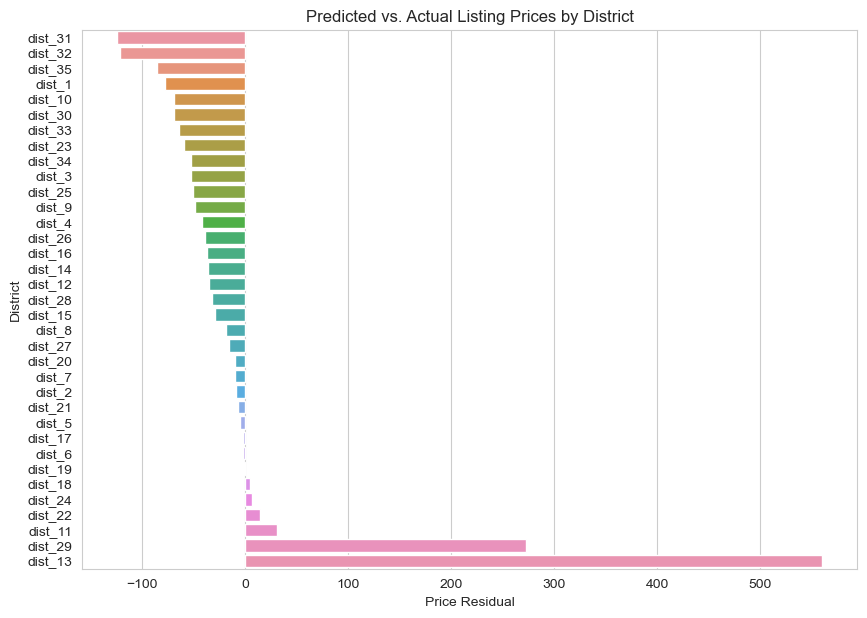

In [49]:
fig = plt.figure(figsize = (10, 7))
df_dist = df_lr.groupby('dist', as_index=False)['ridge_resid'].mean()
df_dist.sort_values(by = "ridge_resid", ascending = False)
df_dist
ax = sns.barplot(x = df_dist["ridge_resid"], y = df_dist["dist"], order = df_dist.sort_values('ridge_resid').dist)
ax.set(xlabel = "Price Residual", ylabel = "District")
ax.set_title("Predicted vs. Actual Listing Prices by District")

This graph looks at the predicted (calculated by the ridge regression model) versus actual listing prices for each district, intending to show which districts are overpriced or underpriced. District 31 has the most underpriced places, while District 13 has the most overpriced places by a long shot. To explain how overpriced District 13 is, the residual average, by definition, is 0, so one would expect an equal amount of overpriced and underpriced districts. District 13 (and, to a lesser extent, District 29) skews the data such that, out of 35 total districts, only 6 are considered overpriced.